In [1]:
from __future__ import print_function
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = '/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/'
data = pd.read_csv(path+'data_month10_21.csv',index_col= [0])
data0 = pd.read_csv(path+'quant10_211231.csv',index_col= [0])

In [3]:
data

,calendarDate,isMonthEnd
28,2010-01-29,1
56,2010-02-26,1
89,2010-03-31,1
119,2010-04-30,1
150,2010-05-31,1
...,...,...
4260,2021-08-31,1
4290,2021-09-30,1
4319,2021-10-29,1
4351,2021-11-30,1


In [4]:
data0

,BIAS20,RSI,ARTDays,InventoryTDays,DebtsAssetRatio,NetProfitRatio,CurrentRatio,QuickRatio,ROE,ROA,...,GREC,DEGM,PB,CurrentRatio.1,FixedAssetsTRate,NetAssetGrowRate,return,stock,tradeDate,y_m
1,-0.331307,-0.705434,-0.208531,1.170825,0.618412,-1.124725,0.132599,-0.083816,-0.619467,-0.924125,...,-0.318926,-0.923607,-0.031993,1.9149,2.001165,-0.519659,-0.178947,000002.XSHE,2010-03-31,2010-03
2,-0.550150,-0.337192,1.976959,0.399902,0.095896,-0.039621,0.654599,0.640853,-0.126152,-0.196492,...,-0.245766,-0.009686,-1.003801,1.4190,1.053636,0.353969,-0.123529,000063.XSHE,2010-03-31,2010-03
3,0.395477,0.411495,0.136692,-2.074853,0.097339,1.273469,-2.084734,-1.404639,-0.617734,-0.066760,...,-0.603884,-0.620997,-0.336910,0.5273,-2.676749,0.098204,-0.213358,000069.XSHE,2010-03-31,2010-03
4,-1.307190,-1.586097,-0.099565,-0.182829,0.679621,0.153034,-0.088892,0.075800,0.662882,0.206668,...,-0.686706,-0.892604,0.122375,1.2669,1.086232,-0.730548,-0.171587,000100.XSHE,2010-03-31,2010-03
5,-0.185916,0.099987,0.653974,0.162349,-0.051154,0.149372,0.258439,0.209515,0.344638,-0.300041,...,0.147703,-0.378986,-0.618789,1.0491,-0.091994,0.142323,-0.148837,000157.XSHE,2010-03-31,2010-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,-1.192829,-0.818840,-1.120120,0.320324,-0.581058,-1.628643,0.645046,0.465729,-1.372375,-1.078898,...,0.933843,-0.580060,0.684695,4.6281,-0.503970,-1.502134,-0.036899,688363.XSHG,2021-11-30,2021-11
32545,0.653200,1.186856,-0.667875,-0.523708,-0.240327,-0.101306,-0.449497,-0.147728,-0.308076,-0.474197,...,-0.298068,1.244492,-0.701669,3.2623,-0.989956,0.288897,-0.097513,688396.XSHG,2021-11-30,2021-11
32546,0.315752,0.703975,2.213232,0.031686,-0.039631,-2.701112,-0.827972,-0.730158,-2.789219,-3.256669,...,-1.026673,1.794142,-0.805991,2.5502,-1.809674,-1.563069,-0.060483,688561.XSHG,2021-11-30,2021-11
32547,0.345915,0.359229,-0.987022,-0.052706,0.363221,0.526027,0.492931,0.283848,0.334268,0.468631,...,1.506374,-0.116970,0.463592,1.1896,0.061220,-0.638463,0.078901,688599.XSHG,2021-11-30,2021-11


In [5]:
data_end = map(lambda x: x[0:4]+x[5:7]+x[8:10], data['calendarDate'].values.tolist())

In [6]:
factor_names =['BIAS20','RSI','ARTDays','InventoryTDays','DebtsAssetRatio','NetProfitRatio','CurrentRatio','QuickRatio','ROE','ROA','PS','KlingerOscillator','PE', 'NetProfitGrowRate', 'MA10', 'MA60', 'LCAP', 'LFLO', 'NPToTOR', 'OperatingProfitGrowRate', 'TotalAssetGrowRate','DAREC','GREC','DEGM','PB' ,'CurrentRatio','FixedAssetsTRate','NetAssetGrowRate']

<AxesSubplot:>

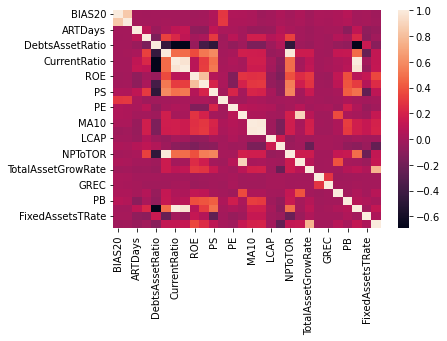

In [7]:
sns.heatmap(data0[factor_names].corr())

In [8]:



#收益率分类 每个月末交易日，前50%为1 ，后50%为0
rets=pd.DataFrame()
for d in data['calendarDate'].values[:]:
    
    
    
    lables = data0[data0['tradeDate']==d]['return']>=data0[data0['tradeDate']==d]['return'].mean()  #为分类处理数据，判断收盘价是否大于今日收盘价
    lables = lables.replace({True:'1',False:'0'})
    
    
    rets=pd.concat([rets,lables])
rets.columns=['rets']
data0=pd.concat([data0,rets],axis=1)    
df=data0
df


,BIAS20,RSI,ARTDays,InventoryTDays,DebtsAssetRatio,NetProfitRatio,CurrentRatio,QuickRatio,ROE,ROA,...,DEGM,PB,CurrentRatio.1,FixedAssetsTRate,NetAssetGrowRate,return,stock,tradeDate,y_m,rets
1,-0.331307,-0.705434,-0.208531,1.170825,0.618412,-1.124725,0.132599,-0.083816,-0.619467,-0.924125,...,-0.923607,-0.031993,1.9149,2.001165,-0.519659,-0.178947,000002.XSHE,2010-03-31,2010-03,0
2,-0.550150,-0.337192,1.976959,0.399902,0.095896,-0.039621,0.654599,0.640853,-0.126152,-0.196492,...,-0.009686,-1.003801,1.4190,1.053636,0.353969,-0.123529,000063.XSHE,2010-03-31,2010-03,0
3,0.395477,0.411495,0.136692,-2.074853,0.097339,1.273469,-2.084734,-1.404639,-0.617734,-0.066760,...,-0.620997,-0.336910,0.5273,-2.676749,0.098204,-0.213358,000069.XSHE,2010-03-31,2010-03,0
4,-1.307190,-1.586097,-0.099565,-0.182829,0.679621,0.153034,-0.088892,0.075800,0.662882,0.206668,...,-0.892604,0.122375,1.2669,1.086232,-0.730548,-0.171587,000100.XSHE,2010-03-31,2010-03,0
5,-0.185916,0.099987,0.653974,0.162349,-0.051154,0.149372,0.258439,0.209515,0.344638,-0.300041,...,-0.378986,-0.618789,1.0491,-0.091994,0.142323,-0.148837,000157.XSHE,2010-03-31,2010-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,-1.192829,-0.818840,-1.120120,0.320324,-0.581058,-1.628643,0.645046,0.465729,-1.372375,-1.078898,...,-0.580060,0.684695,4.6281,-0.503970,-1.502134,-0.036899,688363.XSHG,2021-11-30,2021-11,0
32545,0.653200,1.186856,-0.667875,-0.523708,-0.240327,-0.101306,-0.449497,-0.147728,-0.308076,-0.474197,...,1.244492,-0.701669,3.2623,-0.989956,0.288897,-0.097513,688396.XSHG,2021-11-30,2021-11,0
32546,0.315752,0.703975,2.213232,0.031686,-0.039631,-2.701112,-0.827972,-0.730158,-2.789219,-3.256669,...,1.794142,-0.805991,2.5502,-1.809674,-1.563069,-0.060483,688561.XSHG,2021-11-30,2021-11,0
32547,0.345915,0.359229,-0.987022,-0.052706,0.363221,0.526027,0.492931,0.283848,0.334268,0.468631,...,-0.116970,0.463592,1.1896,0.061220,-0.638463,0.078901,688599.XSHG,2021-11-30,2021-11,1


In [9]:
df.to_csv('label.csv')

In [10]:
data0['rets']

1        0
2        0
3        0
4        0
5        0
        ..
32544    0
32545    0
32546    0
32547    1
32548    0
Name: rets, Length: 23676, dtype: object

In [11]:
# 训练模型

def get_train_val_test_data(date):
        #计算前12个月，采用365天
        d_12=(datetime.datetime.strptime(date, "%Y-%m") - datetime.timedelta(days=365)).strftime('%Y-%m')
        train_df=df[(df['y_m']>=d_12) & (df['y_m']<date)]
        #train_val_df = train_val_df.sample(frac=1).reset_index(drop=True)   
        #拆分训练集、验证集                                 
        test_df =df[df['y_m']==date]   
        return train_df,test_df

def format_feature_label(origin_df, is_filter=True):
    
    #if is_filter:
        #origin_df = origin_df[origin_df['rets']!=0]
    df_test= origin_df                
    feature = origin_df[factor_names]
    label = origin_df['rets']

    return feature, label,df_test



## 1 SVM

In [ ]:
#def pipeline():
df=data0
LR_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    params1 = {'C':range(1,10,2),'gamma':[x /100. for x in range(1,10,2)],'kernel':['linear','poly','rbf','sigmoid']}
    clf_svm = svm.SVC(probability=True)
    clf_AdaBoost = AdaBoostClassifier(n_estimators = 350 , learning_rate = 1.53 ) 
    
    lr=LogisticRegression()           
    params={'C':np.arange(0.01,0.1,0.01)}
    #clf=GridSearchCV(lr,param_grid=params,)
    ada=AdaBoostClassifier( ) 
    params3={'n_estimators':[200,400,600,800,1000],'learning_rate':[0.5,1,1.5]}
    #clf=GridSearchCV(ada,param_grid=params3)
    
   # clf= GridSearchCV(clf_svm, params1)
    #clf.fit(train_feature,train_label)
    
    
    #clf_best=clf.best_estimator_
    clf_best=svm.SVC(C=9,gamma=0.09,kernel='rbf',probability=True)
    
    #clf_best=AdaBoostClassifier(n_estimators = 800 , learning_rate = 1.53 ) 
    print(clf_best)
    clf_best.fit(train_feature,train_label)
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    accuracy.append(clf_best.score(test_feature,test_label))
    LR_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return LR_model_list,final,accuracy
print('accuracy=%f'% (pd.Series(accuracy).mean()))
plt.plot(accuracy,label='accuracy')


In [ ]:
result_path='/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/result/'
final.to_csv(result_path+'svmfyp_final.csv')

In [ ]:
df[['stock', 'tradeDate', 'rets']]

## 2. logitic regression method

In [ ]:
#def pipeline():
df=data0
LR_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    
    lr=LogisticRegression()           
    params={'C':np.arange(0.01,0.1,0.01)}
    clf=GridSearchCV(lr,param_grid=params)
   
    
    clf.fit(train_feature,train_label)
    clf_best=clf.best_estimator_
    clf_best.fit(train_feature,train_label)
            
    
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    accuracy.append(clf_best.score(test_feature,test_label))
    LR_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return LR_model_list,final,accuracy
print('accuracy=%f'% (pd.Series(accuracy).mean()))
plt.plot(accuracy,label='accuracy')
result_path='/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/result/'
final.to_csv(result_path+'lr_fyp_final.csv')

In [ ]:
df[['stock', 'tradeDate', 'rets']]

## 3. RF method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:



#def pipeline():
df=data0
RF_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    
#     lr=LogisticRegression()           
#     params={'C':np.arange(0.01,0.1,0.01)}
#    clf=GridSearchCV(lr,param_grid=params)
#     clf = RandomForestClassifier(n_estimators = 100)  # 100 decision trees
    
   

    # 随机森林中树的个数
    n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)]
    # 每一节点考虑切分的节点数
    max_features = ['auto', 'sqrt']
    # 最大深度
    max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
    max_depth.append(None)
    # 切分一个节点最小数量
    min_samples_split = [2, 5, 10]
    # 每一叶子节点最小数量
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # 模型构建
    RFclf = RandomForestClassifier()
    para_grid = {'max_depth': [10], 'n_estimators': [100], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}#对以上参数进行网格搜索
    clf = GridSearchCV(RFclf, param_grid=para_grid, cv=3, scoring='accuracy')

    
# gs.fit(X, y)
# gs_best = gs.best_estimator_ #选择出最优的学习器
# gs.best_score_ #最优学习器的精度

    
#     clf = GridSearchCV(rfc,param_grid)
    
    clf.fit(train_feature,train_label)
    clf_best=clf.best_estimator_
    clf_best.fit(train_feature,train_label)
            
    
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    accuracy.append(clf_best.score(test_feature,test_label))
    RF_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return RF_model_list,final,accuracy
print('accuracy=%f'% (pd.Series(accuracy).mean()))
plt.plot(accuracy,label='accuracy')
result_path='/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/result/'
final.to_csv(result_path+'RF_fyp_final.csv')

## 4. Adaboost Method

In [ ]:
#def pipeline():
df=data0
LR_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    params1 = {'C':range(1,10,2),'gamma':[x /100. for x in range(1,10,2)],'kernel':['linear','poly','rbf','sigmoid']}
    clf_svm = svm.SVC(probability=True)
    clf_AdaBoost = AdaBoostClassifier(n_estimators = 350 , learning_rate = 1.53 ) 
    
#     lr=LogisticRegression()           
#     params={'C':np.arange(0.01,0.1,0.01)}
    #clf=GridSearchCV(lr,param_grid=params,)
    ada=AdaBoostClassifier( ) 
    params3={'n_estimators':[200,400,600,800,1000],'learning_rate':[0.5,1,1.5]}
    clf=GridSearchCV(ada,param_grid=params3)
    
   # clf= GridSearchCV(clf_svm, params1)
    #clf.fit(train_feature,train_label)
    
    
    #clf_best=clf.best_estimator_
#     clf_best=svm.SVC(C=9,gamma=0.09,kernel='rbf',probability=True)
    
    #clf_best=AdaBoostClassifier(n_estimators = 800 , learning_rate = 1.53 ) 
    print('best outcome', clf_best)
    clf_best.fit(train_feature,train_label)
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    accuracy.append(clf_best.score(test_feature,test_label))
    LR_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return LR_model_list,final,accuracy
print('accuracy=%f'% (pd.Series(accuracy).mean()))
plt.plot(accuracy,label='accuracy')
result_path='/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/result/'
final.to_csv(result_path+'adaboost_fyp_final.csv')

## 5. CNN

https://blog.csdn.net/bqw18744018044/article/details/82598131?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164318941716780271542140%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164318941716780271542140&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-7-82598131.pc_search_insert_ulrmf&utm_term=cnn+二分类&spm=1018.2226.3001.4187

In [15]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [13]:
classifier = Sequential()

classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [ ]:
#def pipeline():
df=data0
LR_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    params1 = {'C':range(1,10,2),'gamma':[x /100. for x in range(1,10,2)],'kernel':['linear','poly','rbf','sigmoid']}
    clf_svm = svm.SVC(probability=True)
    clf_AdaBoost = AdaBoostClassifier(n_estimators = 350 , learning_rate = 1.53 ) 
    
#     lr=LogisticRegression()           
#     params={'C':np.arange(0.01,0.1,0.01)}
    #clf=GridSearchCV(lr,param_grid=params,)
    ada=AdaBoostClassifier( ) 
    params3={'n_estimators':[200,400,600,800,1000],'learning_rate':[0.5,1,1.5]}
    clf=GridSearchCV(ada,param_grid=params3)
    
   # clf= GridSearchCV(clf_svm, params1)
    #clf.fit(train_feature,train_label)
    
    
    #clf_best=clf.best_estimator_
#     clf_best=svm.SVC(C=9,gamma=0.09,kernel='rbf',probability=True)
    
    #clf_best=AdaBoostClassifier(n_estimators = 800 , learning_rate = 1.53 ) 
    print('best outcome', clf_best)
    clf_best.fit(train_feature,train_label)
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    accuracy.append(clf_best.score(test_feature,test_label))
    LR_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return LR_model_list,final,accuracy
# print('accuracy=%f'% (pd.Series(accuracy).mean()))
# plt.plot(accuracy,label='accuracy')
# result_path='/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/DATA/uquantdata/result/'
# final.to_csv(result_path+'adaboost_fyp_final.csv')

In [23]:
#def pipeline():
df=data0
RNN_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    #print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)


28678    0
28679    0
28680    0
28681    0
28682    1
        ..
32244    0
32245    1
32246    1
32247    0
32248    0
Name: rets, Length: 2812, dtype: object

## 6 RNN- BiLstm

## 7 LGBM

## 8 TransformerNet